In [1]:


################################################
##
## plotting subwords
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt



#######################################################

np.set_printoptions(suppress=True)


#######################################################



In [2]:
ML_raw_data = pd.read_csv('CopperScroll_ML_metrics_results.csv', index_col=False) 



## ML_raw_data.reset_index(drop=True, inplace=True)

In [3]:
the_preds_for_ids = pd.read_csv('pred_subwords_select_for_attack.csv', index_col=False) 


pd.set_option('display.max_rows', None)
the_preds_for_ids = the_preds_for_ids.sort_values('recall', ascending=False)
the_preds_for_ids

,Unnamed: 0,recall,idsubword,subword
0,96311,0.981982,163728,Krist
1,85062,0.971281,147744,सकेको
2,2864,0.968374,28067,കെ
3,34654,0.965599,74542,dija
4,22739,0.957658,57009,jina
5,23614,0.955418,58300,এম
6,4466,0.951398,30350,ratu
7,21151,0.950712,54648,roi
8,149087,0.950472,235972,Əliyev
9,29705,0.948823,67259,kær


In [4]:
use_these_top_ids = the_preds_for_ids['idsubword'][0:574].to_list()
use_these_top_ids

[163728,
 147744,
 28067,
 74542,
 57009,
 58300,
 30350,
 54648,
 235972,
 67259,
 64087,
 157189,
 84327,
 37414,
 26679,
 37881,
 73652,
 40924,
 91301,
 101003,
 96065,
 67890,
 54442,
 82315,
 27641,
 96935,
 58393,
 32775,
 86069,
 29392,
 95079,
 37188,
 214801,
 69677,
 112064,
 41870,
 59342,
 182084,
 187392,
 78423,
 48972,
 113090,
 72772,
 74540,
 161313,
 34132,
 31890,
 55462,
 93129,
 228175,
 94918,
 54950,
 133952,
 67737,
 53044,
 87756,
 37627,
 194991,
 143983,
 213022,
 27023,
 178494,
 79646,
 134596,
 32251,
 134452,
 36361,
 81587,
 70152,
 24275,
 124045,
 33003,
 32636,
 27579,
 55855,
 60409,
 102497,
 31115,
 65301,
 146625,
 33291,
 56975,
 206833,
 35403,
 61399,
 127648,
 74170,
 59378,
 51856,
 51016,
 110395,
 153423,
 75708,
 203330,
 48458,
 70427,
 132244,
 87230,
 85415,
 197625,
 68336,
 67323,
 61194,
 91320,
 91723,
 65227,
 159283,
 49610,
 35585,
 49445,
 183099,
 40931,
 92118,
 37043,
 66159,
 30489,
 89433,
 57205,
 63933,
 72706,
 61454,
 

In [5]:

result_pd = ML_raw_data[['recall', 'subword','idsubword']]

print(result_pd)

recalls    = result_pd['recall']
idsubwords = result_pd['idsubword']

print(len(recalls))

       recall    subword  idsubword
0    0.720735        NaN        -15
1    0.835696        son         -7
2    0.705512      Krist     163728
3    0.754331      सकेको     147744
4    0.712336         കെ      28067
5    0.763255       dija      74542
6    0.765879       jina      57009
7    0.713911         এম      58300
8    0.686089       ratu      30350
9    0.764304        roi      54648
10   0.833071     Əliyev     235972
11   0.759580        kær      67259
12   0.672966       fara      64087
13   0.724934         આર     157189
14   0.676640       жете      84327
15   0.702887         کي      37414
16   0.741732        zir      26679
17   0.635171       каза      37881
18   0.702362        პრო      73652
19   0.529659       поль      40924
20   0.749606         ਐਸ      91301
21   0.900787      కృష్ణ     101003
22   0.681365        မီး      96065
23   0.586352       posi      67890
24   0.758530        ಆರ್      54442
25   0.708136        кош      82315
26   0.743307       meli    

In [6]:
result_pd = result_pd[   result_pd['idsubword'].isin(use_these_top_ids)   ]

recalls    = result_pd['recall']
idsubwords = result_pd['idsubword']

print(result_pd)


print(len(recalls))

       recall    subword  idsubword
2    0.705512      Krist     163728
3    0.754331      सकेको     147744
4    0.712336         കെ      28067
5    0.763255       dija      74542
6    0.765879       jina      57009
7    0.713911         এম      58300
8    0.686089       ratu      30350
9    0.764304        roi      54648
10   0.833071     Əliyev     235972
11   0.759580        kær      67259
12   0.672966       fara      64087
13   0.724934         આર     157189
14   0.676640       жете      84327
15   0.702887         کي      37414
16   0.741732        zir      26679
17   0.635171       каза      37881
18   0.702362        პრო      73652
19   0.529659       поль      40924
20   0.749606         ਐਸ      91301
21   0.900787      కృష్ణ     101003
22   0.681365        မီး      96065
23   0.586352       posi      67890
24   0.758530        ಆರ್      54442
25   0.708136        кош      82315
26   0.743307       meli      27641
27   0.779528       dori      96935
28   0.699738         აკ    

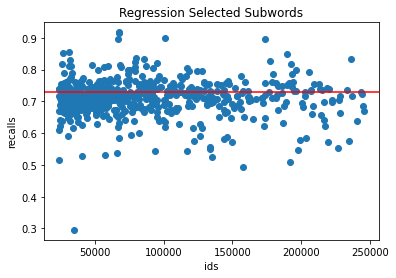

In [7]:


fig = plt.figure()

plt.xlabel("ids")
plt.ylabel("recalls")

plt.scatter(idsubwords, recalls) 
plt.title("Regression Selected Subwords")
plt.axhline(y=0.73 , color='r', linestyle='-')
plt.savefig('300dpiCopperScroll574.png', dpi=300)
plt.show()



In [8]:
df = result_pd 
df
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values('recall', ascending=False)
df_sorted


,recall,subword,idsubword
494,0.917585,రావు,67683
183,0.916535,प्रसाद,67510
21,0.900787,కృష్ణ,101003
301,0.896588,कुमार,67122
470,0.896063,වීර,173558
282,0.854068,देव,31557
445,0.853018,mund,26770
533,0.847769,కుమార్,189928
472,0.835171,შვილი,79837
249,0.834646,رضا,86033


In [9]:
recalls_count    = df_sorted[    df_sorted['recall'] > 0.73 ]
print(len(recalls_count))

194


In [10]:
recalls_count    = df_sorted[    df_sorted['recall'] < 0.73 ]
print(len(recalls_count))

378


In [11]:
x = 195 / (379 + 195)
x

0.3397212543554007